<a href="https://colab.research.google.com/github/nmaguette/machine_learning_workshops/blob/master/D1_4_1_Unsupervised_%2B_dimentionality_reduction%2C_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST dataset exploration

Load the MNIST dataset (http://yann.lecun.com/exdb/mnist/) and split it into a training set and a test set (60,000 instances for training, and 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

### 1) Load the MNIST dataset

In [0]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

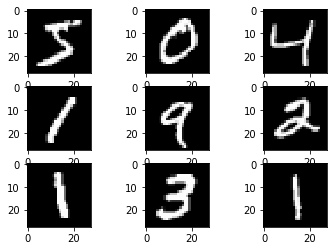

In [0]:
for row in range(3):
  for col in range(3):
    idx = row*3 + col + 1
    plt.subplot(3,3, idx)
    plt.imshow(X_train[idx-1], cmap="gray")

### 2) Split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

In [0]:
num_classes = np.unique(Y_train).shape[0]
print("Shape of training dataset:", X_train.shape)
print("Number of training examples:", X_train.shape[0])
print("Number of testing examples:", X_test.shape[0])
print("Number of classes:", num_classes)
print("Image shape:", X_train[0].shape)
print("Image data type:", X_train.dtype)

Shape of training dataset: (60000, 28, 28)
Number of training examples: 60000
Number of testing examples: 10000
Number of classes: 10
Image shape: (28, 28)
Image data type: uint8


In [0]:
print(Y_train)
print(Y_test)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


### 3) Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

rd_model = RandomForestClassifier()
nsamples, nx, ny = X_train.shape
nsamples2, nx2, ny2 = X_test.shape
X_train_2d = X_train.reshape((nsamples,nx*ny))
X_test_2d = X_test.reshape((nsamples2,nx2*ny2))

start_time=time.time()
rd_model.fit(X_train_2d,Y_train)
end_time=time.time()
diff_time=(end_time-start_time)*1000
print("It took %.2f ms to train the model." % diff_time)

Y_train_pred = rd_model.predict(X_train_2d)
Y_test_pred = rd_model.predict(X_test_2d)
print("Training accuracy is:", accuracy_score(y_pred=Y_train_pred, y_true=Y_train))
print("Testing accuracy is:", accuracy_score(y_pred=Y_test_pred, y_true=Y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


It took 5034.30 ms to train the model.
Training accuracy is: 0.9991833333333333
Testing accuracy is: 0.9466


### 4) use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%.

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
mnist_combined_data= np.concatenate((X_train_2d, X_test_2d))
mnist_pca = pca.fit_transform(mnist_combined_data)

print("Total explained variance ratio is: %.2f" % (sum(pca.explained_variance_ratio_)*100))

Total explained variance ratio is: 95.03


In [0]:
mnist_pca.shape

(70000, 154)

### 5) Train a new Random Forest classifier on the reduced dataset and see how long it takes.

In [0]:
X_train_pca=mnist_pca[:X_train_2d.shape[0]]
X_test_pca=mnist_pca[X_train_2d.shape[0]:]

X_train_pca.shape

(60000, 154)

In [0]:
X_test_pca.shape

(10000, 154)

In [81]:
rd_model_with_pca = RandomForestClassifier(min_impurity_decrease=0.001)

start_time=time.time()
rd_model_with_pca.fit(X_train_pca,Y_train)
end_time=time.time()
diff=(end_time-start_time)*1000
print("It took %.2f ms to train the model." % diff)

Y_train_pca_pred = rd_model_with_pca.predict(X_train_pca)
print("Training accuracy is:", accuracy_score(y_pred=Y_train_pca_pred, y_true=Y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


It took 5998.93 ms to train the model.
Training accuracy is: 0.8002333333333334


### 6) Was training much faster?

<font color=green>No, the training was two times longer. We reduce the dimension of our data, but the Random Forest didn't necessary fit faster.</font>



### 7) Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [80]:
Y_test_pca_pred = rd_model_with_pca.predict(X_test_pca)
print("Testing accuracy is:", accuracy_score(y_pred=Y_test_pca_pred, y_true=Y_test))

Testing accuracy is: 0.8919


<font color=green>We have a less high accuracy score but it is much less overfitted compare to the accuracy of the previous classifier.</font>


### 7.5) Choose different number of features between 1 and 784 and plot:
1.   Variance explained with PCA
2.   Train & test errors




In [0]:
def applyRandomForest(X_train, Y_train, X_test, Y_test):
  rd = RandomForestClassifier()
  start_time=time.time()
  rd.fit(X_train,Y_train)
  end_time=time.time()
  diff=(end_time-start_time)*1000
  Y_train_pred = rd.predict(X_train)
  train_accuracy=accuracy_score(y_pred=Y_train_pred, y_true=Y_train)
  test_accuracy=accuracy_score(y_pred=Y_test_pred, y_true=Y_test)
  return (diff, train_accuracy, test_accuracy)

In [0]:
def PCAdimreduc(n_components, X_train, X_test):
  pca = PCA(n_components=n_components)
  combined_data= np.concatenate((X_train, X_test))
  combined_data_pca = pca.fit_transform(combined_data)
  exp_var=sum(pca.explained_variance_ratio_)*100
  X_train_pca=combined_data_pca[:X_train.shape[0]]
  X_test_pca=combined_data_pca[X_train.shape[0]:]
  return (exp_var, X_train_pca, X_test_pca)

In [0]:
training_accuracy_scores=[]
test_accuracy_scores=[]
variances=[]
times=[]

for feature in range(1,784,100) :
  print("Number of features =", feature)
  exp_var, X_train_pca, X_test_pca = PCAdimreduc(feature, X_train_2d, X_test_2d)
  variances.append(exp_var)
  diff, train_accuracy, test_accuracy=applyRandomForest(X_train_pca, Y_train, X_test_pca, Y_test)
  times.append(diff)
  training_accuracy_scores.append(train_accuracy)
  test_accuracy_scores.append(test_accuracy)

Number of features = 1


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Number of features = 101


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Number of features = 201


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Number of features = 301


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Number of features = 401


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Number of features = 501


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Number of features = 601


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Number of features = 701


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


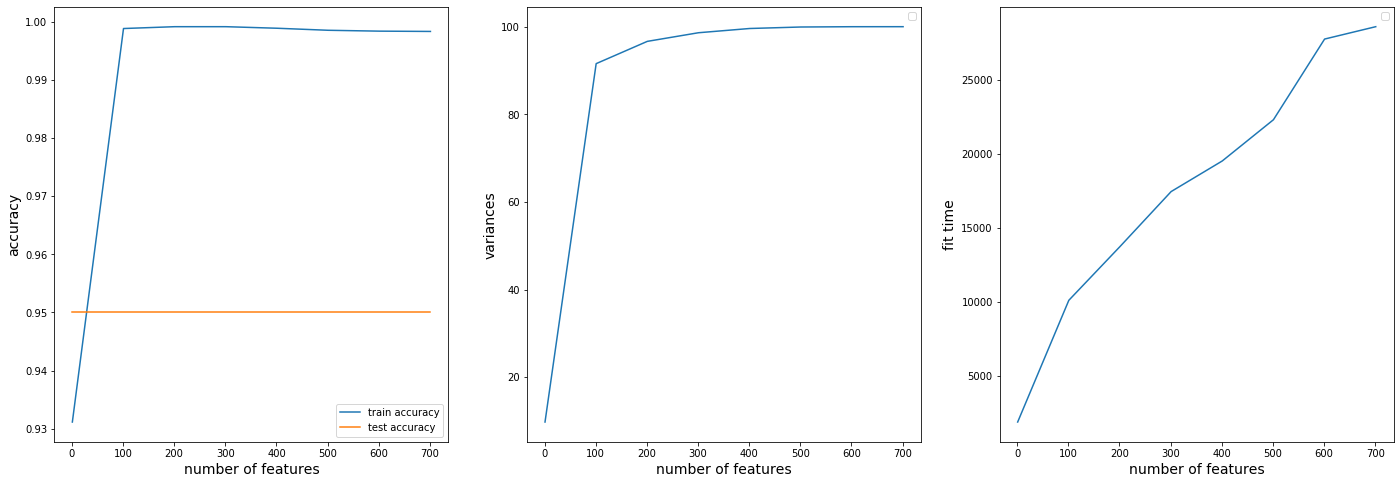

In [0]:
plt.figure(figsize=(24,8))

plt.subplot(1,3,1)
plt.plot(list(range(1,784,100)), training_accuracy_scores, label='train accuracy')
plt.plot(list(range(1,784,100)), test_accuracy_scores, label='test accuracy')
plt.xlabel('number of features', fontsize = 14)
plt.ylabel('accuracy', rotation = 90, fontsize = 14)
plt.legend(loc='best')

plt.subplot(1,3,2)
plt.plot(list(range(1,784,100)), variances)
plt.xlabel('number of features', fontsize = 14)
plt.ylabel('variances', rotation = 90, fontsize = 14)
plt.legend(loc='best')

plt.subplot(1,3,3)
plt.plot(list(range(1,784,100)), times)
plt.xlabel('number of features', fontsize = 14)
plt.ylabel('fit time', rotation = 90, fontsize = 14)
plt.legend(loc='best')
plt.show()

<font color=green>We see that if we choose 1 we get bad result but the result gets better as we increase the number of features.

# PCA, K-means and k-NN

### 1) Implement PCA from scratch: 
You have input data $(x_1,\dots, x_n)$ which is $d$-dimensional and number of projections $k$, return new data and percentage of you data explained. Test your function on different data.

In [0]:
def pca_from_scratch(X,k):
  print("number of projections k:", k)
  s, w = np.linalg.eig(X.T.dot(X))
  """print("eigen values:", s)
  print("s shape:", s.shape)
  print("eigen vectors:", w)
  print("w shape:", w.shape)

  print("\n\nw[:k]:", w[:,:1])
  print("s[:k]:", s[:1])"""
  X_new = X.dot(w[:,:k])
  explained_data=sum(s[:k])/sum(s)
  print("explained_data:", explained_data)
  print("new X:", X_new)
  return (X_new, explained_data)

In [123]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X_new, explained_data = pca_from_scratch(X,1)

number of projections k: 1
explained_data: 0.9924428900898052
new X: [[-1.38340578]
 [-2.22189802]
 [-3.6053038 ]
 [ 1.38340578]
 [ 2.22189802]
 [ 3.6053038 ]]


In [124]:
X = np.array([[-1, -1, -2, -1], [-3, -2, 1, 1], [2, 1, 3, 2], [8, -1, 7, 2], [2, 0, 5, 5], [4, 6, 6, 3], [1, -4, -4, 2]])
for i in range(1,5):
  X_new, explained_data = pca_from_scratch(X,i)

number of projections k: 1
explained_data: 0.7306573196466223
new X: [[-2.58070001]
 [-1.1128421 ]
 [ 4.18459737]
 [ 9.88003112]
 [ 6.36307989]
 [ 9.05653101]
 [-2.6969599 ]]
number of projections k: 2
explained_data: 0.8854285902187511
new X: [[-2.58070001  0.44285784]
 [-1.1128421   0.67300479]
 [ 4.18459737  0.10698136]
 [ 9.88003112  3.71929514]
 [ 6.36307989  1.54692849]
 [ 9.05653101 -3.51710113]
 [-2.6969599   4.92891587]]
number of projections k: 3
explained_data: 0.9622068981580192
new X: [[-2.58070001e+00  4.42857842e-01 -3.76840539e-01]
 [-1.11284210e+00  6.73004793e-01  3.28582180e+00]
 [ 4.18459737e+00  1.06981362e-01  6.24826578e-01]
 [ 9.88003112e+00  3.71929514e+00 -2.08691293e+00]
 [ 6.36307989e+00  1.54692849e+00  3.29670766e+00]
 [ 9.05653101e+00 -3.51710113e+00  1.73041226e-03]
 [-2.69695990e+00  4.92891587e+00  1.12971761e-01]]
number of projections k: 4
explained_data: 1.0
new X: [[-2.58070001e+00  4.42857842e-01 -3.76840539e-01 -4.30766902e-02]
 [-1.11284210e+00 

### 2) Implement K-means from scratch: 
You have input data $(x_1,\dots, x_n)$ which is $d$-dimensional and number of clusters $k$, return clustered data. Test your function on different data.

In [136]:
initial_centroids = np.random.rand(2,1)
print(initial_centroids)
print(initial_centroids[0])
x0 = np.sqrt(np.sum(np.square(X[0,:])))
print(x0)
x0-initial_centroids[0]

[[0.7747057  0.86212994]]
[0.7747057  0.86212994]
2.6457513110645907


array([1.87104561, 1.78362137])

In [169]:
X = np.array([[-1, -1], [0, -2]])
print(X[0])
np.where(min(X[1]))

[-1 -1]


(array([0]),)

In [191]:
def fs_kmeans(X,k):
  np.random.seed(42)
  n = X.shape[0]
  d = X.shape[1]
  centroids = np.random.rand(k,d)
  print("initial_centroids:", centroids)
  converge=100
  while converge>0.5:
    clusters=[[]]*k
    results = [[]]*k #np.zeros((n,k))
    for i in range(n):
      for j in range(k):
        for l in range(d):
          print("i", i)
          print("j", j)
          print("result[i,j]",result[i,j])
          print("X[i,l]", X[i,l])
          print("centroids[j,l]",centroids[j,l])
          result[i,j] += (X[i,l] - centroids[j,l])**2
      for j in range(k):
        if result[i,j] == min(result[i]):
          clusters[j].append(xi)
          break
    for j in range(k):
      converge = abs(centroids[j] - np.mean(clusters[j]))
      centroids[j]=np.mean(clusters[j])
  return clusters


"""     
"""
  # 1 step is to allocate all n points to k classes : we have vector classes [1,n] with elements between 1 and k
  # example: n = 8, k = 3   [1,3,2,3,1,1,3,2]
  # calculate centroids : Centroids k x d dimensional matrix
  # matrix X is n by d size, 
  # result is n by k table of distances between n points and k centroids.

'     \n'

In [192]:
X = np.array([[-1, -1, -2, -1], [-3, -2, 1, 1], [2, 1, 3, 2], [8, -1, 7, 2], [2, 0, 5, 5], [4, 6, 6, 3], [1, -4, -4, 2]])
fs_kmeans(X,2)

initial_centroids: [[0.37454012 0.95071431 0.73199394 0.59865848]
 [0.15601864 0.15599452 0.05808361 0.86617615]]
i 0
j 0


TypeError: ignored

### 3) Implement K-NN from scratch:
You have input data $(x_1,\dots, x_n)$ which is $d$-dimensional. Implement $k$ nearest neighoubrs algorighm. Test you function on different data.